In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


In [67]:
def add_headers(
    fig,
    *,
    row_headers=None,
    col_headers=None,
    row_pad=1,
    col_pad=5,
    rotate_row_headers=True,
    **text_kwargs
):
    # Based on https://stackoverflow.com/a/25814386

    axes = fig.get_axes()

    for ax in axes:
        sbs = ax.get_subplotspec()

        # Putting headers on cols
        if (col_headers is not None) and sbs.is_first_row():
            ax.annotate(
                col_headers[sbs.colspan.start],
                xy=(0.5, 1),
                xytext=(0, col_pad),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline",
                **text_kwargs,
            )

        # Putting headers on rows
        if (row_headers is not None) and sbs.is_first_col():
            ax.annotate(
                row_headers[sbs.rowspan.start],
                xy=(0, 0.5),
                xytext=(-ax.yaxis.labelpad - row_pad, 0),
                xycoords=ax.yaxis.label,
                textcoords="offset points",
                ha="right",
                va="center",
                rotation=rotate_row_headers * 90,
                **text_kwargs,
            )

In [80]:
mpl.style.use('seaborn')
markersize = 7
linewidth = 2

def make(axs,i,j,data):

    x = [i for i in range(1,26)]
    accuracy = data['accuracy']
    val_accuracy = data['val_accuracy']
    val_loss = data['val_loss']
    loss = data['loss']

    axs[i,j].plot(x, accuracy,color='blue', marker='o', label='Train Acc', linewidth=linewidth, markersize=markersize)
    axs[i,j].plot(x, val_accuracy, color='orange', marker='D', label='Val Acc', linewidth=linewidth, markersize=markersize)
    axs[i,j].plot(x, loss, color='green', marker='s', label='Train Loss', linewidth=linewidth, markersize=markersize)
    axs[i,j].plot(x, val_loss, color='red', marker='X', label='Val Loss', linewidth=linewidth, markersize=markersize)
    if j == 1 :
        axs[i,j].axis([0,26,-0.05,1.05])
    axs[i,j].legend()
    axs[i,j].set_xlabel('Epochs')
    axs[i,j].set_ylabel('Accuracy/Loss')
    # axs[i,j].title.set_text(name)

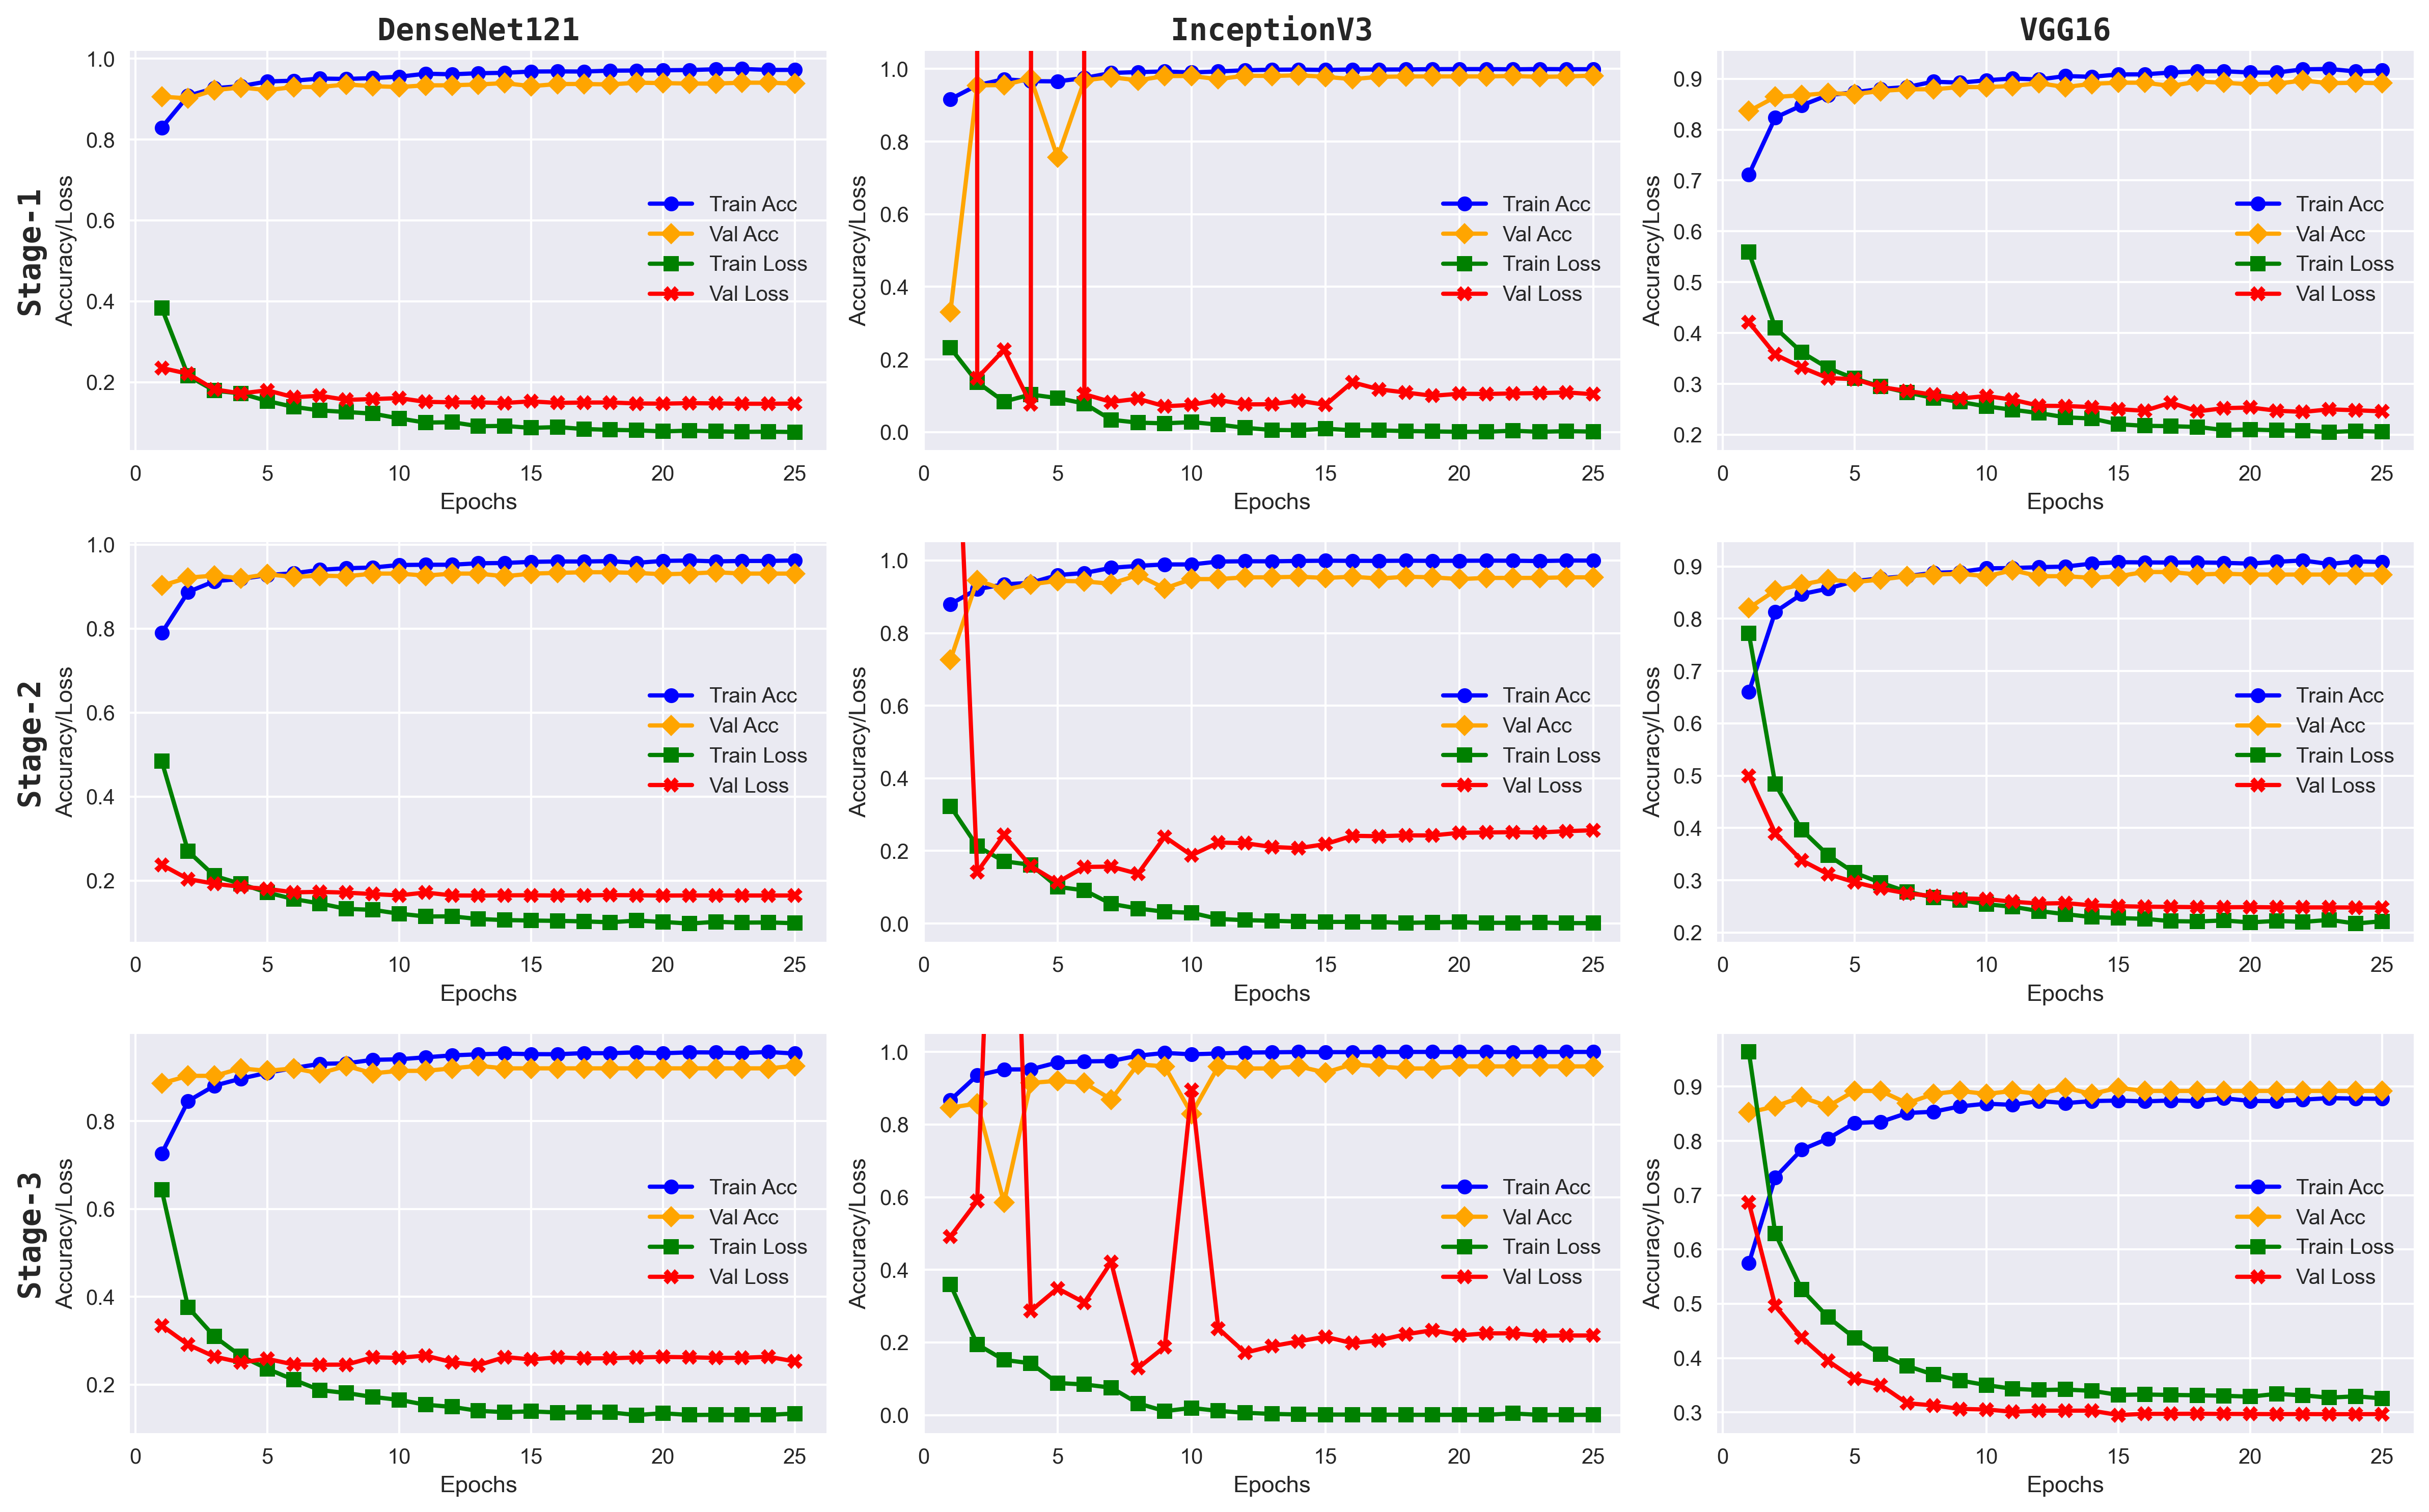

In [81]:
model = ['DenseNet121','InceptionV3','VGG16']
row_headers = ['Stage-1','Stage-2','Stage-3']

fig, axs = plt.subplots(3,3,figsize=(16,10),dpi=300)
for i in range(3):
    path = f'stage{i+1}'
    for j in range(3):
        name = model[j]
        path_data = path+'/'+name+f'_{i+1}.csv'
        data = pd.read_csv(path_data)
        make(axs,i,j,data)

font_kwargs = dict(fontfamily="monospace", fontweight="bold", fontsize="x-large")
add_headers(fig, col_headers=model, row_headers=row_headers, **font_kwargs)

plt.tight_layout()


In [82]:
name = 'Model_History'
image_format = 'svg' # e.g .png, .svg, etc.
image_name = name+'.svg'

fig.savefig(image_name, format=image_format, dpi=1200)